In [ ]:
from femda_imports import *
import breizhcrops as bzh
warnings.filterwarnings('ignore') # AMI warning
%matplotlib inline

In [4]:
bzh_train_raw = bzh.BreizhCrops("frh01")

In [5]:
bzh_test_raw = bzh.BreizhCrops("frh04")

In [6]:
def Dataset2numpy(dataset, l=-1):
    if l==-1: l = len(dataset)
    TD = dataset[0][0].shape
    X = np.zeros((l, *TD))
    y = np.zeros((l))
    for i in tqdm(range(len(dataset))):
        if i==l: break
        X[i,:,:] = dataset[i][0].numpy()
        y[i] = dataset[i][1].numpy()
    X_flat = X.reshape(l, -1)
    return X_flat, y

bzh_train, bzh_y = Dataset2numpy(bzh_train_raw, l=10000)
bzh_test, bzh_test_y = Dataset2numpy(bzh_test_raw, l=3000)

In [4]:
%store -r bzh_train

In [5]:
%store -r bzh_test

In [6]:
%store -r bzh_y

In [7]:
%store -r bzh_test_y

In [8]:
cats = np.unique(bzh_y)

In [10]:
print(np.unique(bzh_y), np.unique(bzh_test_y))

[0. 1. 2. 3. 5. 7. 8.] [0. 1. 2. 3. 5. 7. 8.]


In [11]:
print([(bzh_y == u).sum() for u in cats], [(bzh_test_y == u).sum() for u in cats])

[706, 1565, 279, 2270, 26, 1985, 3169] [162, 452, 75, 819, 10, 629, 853]


In [12]:
bzh_train.shape

(10000, 585)

In [13]:
bzh_test.shape

(3000, 585)

In [19]:
results_t = []; results_f = []
NUMBER_OF_RUNS = 20
result_book_bzh= np.zeros((NUMBER_OF_ALGORITHMS,NUMBER_OF_MEASURES_REAL,NUMBER_OF_RUNS))
for i in range(NUMBER_OF_RUNS):
    bzh_pca, bzh_labels, _, _, pca = import_subset(bzh_train, bzh_y, cats, (i+1)*10, -1)
    bzh_test_pca, bzh_test_labels, _, _,_ = import_subset(bzh_test, bzh_test_y, cats, (i+1)*10, -1, pca=pca)
    models, result_book_bzh[:,:,i] = run_all(bzh_pca, bzh_labels, bzh_test_pca, bzh_test_labels, percent_outliers=0, conf=False, verbose=True, return_results=True)
    results_t.append(result_book_bzh[-3,1,i])
    results_f.append(result_book_bzh[-2,1,i])

LDA
N 3000 Accuracy 0.28767 ARI -0.00106 AMI 0.0
QDA
N 3000 Accuracy 0.28067 ARI -0.0006 AMI -0.00031
RQDA-MCD
RGQDA-MCD
t-QDA
N 3000 Accuracy 0.28067 ARI -0.0003 AMI 0.00024
FEMDA with p/trace
N 3000 Accuracy 0.272 ARI 0.00176 AMI -0.00133
FEMDA pre-normalised
N 3000 Accuracy 0.274 ARI 0.00241 AMI -0.00057
LDA
N 3000 Accuracy 0.28367 ARI -0.00016 AMI 0.00054
QDA
N 3000 Accuracy 0.27733 ARI 2e-05 AMI -0.00041
RQDA-MCD
RGQDA-MCD
t-QDA
N 3000 Accuracy 0.277 ARI -0.00023 AMI -0.00045
FEMDA with p/trace
N 3000 Accuracy 0.263 ARI -0.00052 AMI 6e-05
FEMDA pre-normalised
N 3000 Accuracy 0.26167 ARI -0.00085 AMI -1e-05
LDA
N 3000 Accuracy 0.28267 ARI 0.00228 AMI 0.00064
QDA
RQDA-MCD
RGQDA-MCD
t-QDA
FEMDA with p/trace
N 3000 Accuracy 0.261 ARI -0.0003 AMI 4e-05
FEMDA pre-normalised
N 3000 Accuracy 0.259 ARI -0.00076 AMI -0.00016
LDA
N 3000 Accuracy 0.302 ARI 0.00278 AMI 0.0023
QDA
RQDA-MCD
RGQDA-MCD
t-QDA
FEMDA with p/trace
N 3000 Accuracy 0.25467 ARI 0.00269 AMI 0.00042
FEMDA pre-normalised
N 

In [26]:
%store result_book_bzh

Stored 'result_book_bzh' (ndarray)


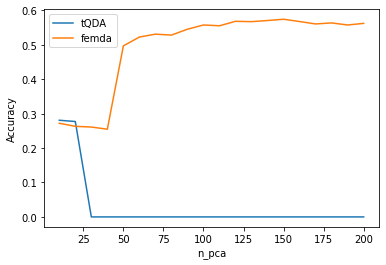

In [25]:
plot_tQDA_vs_FEMDA(result_book_bzh, xaxis=10*(np.arange(NUMBER_OF_RUNS)+1), ylim=None)

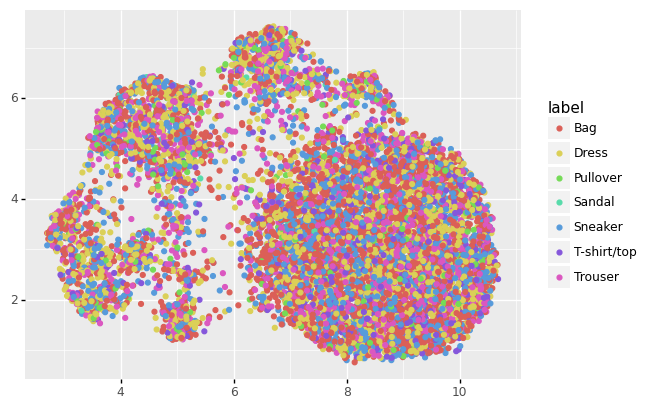

<ggplot: (165498985930)>

In [17]:
plot_fashion_mnist(bzh_pca, bzh_labels, "BC_UMAP_test.png")

LDA
Before priors [[-36.47789612 -31.64769871 -30.70639399 ... -31.33114144 -31.2760716
  -36.53859123]
 [-36.56010895 -31.06043836 -30.60889394 ... -31.1338642  -31.53845318
  -36.59633863]
 [-36.60334947 -30.83005401 -30.26141135 ... -31.6684272  -31.25422238
  -36.91333948]
 ...
 [-39.76822909 -29.68473791 -31.76829158 ... -32.56457117 -33.25697208
  -37.94329432]
 [-36.8268954  -31.07242591 -30.67345828 ... -31.03523337 -31.35999446
  -36.54390793]
 [-37.36275345 -31.10184151 -30.34076702 ... -30.5845552  -31.57604388
  -36.38179463]]
After priors [[-39.12862126 -34.29842385 -33.35711913 ... -33.98186657 -33.92679674
  -39.18931636]
 [-38.41480822 -32.91513763 -32.46359321 ... -32.98856347 -33.39315245
  -38.4510379 ]
 [-40.18247806 -34.4091826  -33.84053994 ... -35.24755579 -34.83335097
  -40.49246807]
 ...
 [-45.72047292 -35.63698175 -37.72053541 ... -38.51681501 -39.20921591
  -43.89553816]
 [-38.44386158 -32.68939209 -32.29042446 ... -32.65219954 -32.97696064
  -38.16087411]
 [

{'LDA': <literature_models.LDA at 0x268f3597fd0>,
 'QDA': <literature_models.QDA at 0x268f3597280>,
 'RQDA-MCD': <literature_models.RGQDA at 0x268f3597580>,
 'RGQDA-MCD': <literature_models.RGQDA at 0x268f3597910>,
 't_QDA': <literature_models.t_QDA at 0x268f3597cd0>,
 'FEMDA': <femda.FEMDA at 0x268f35977c0>,
 'FEMDA_N': <femda.FEMDA_N at 0x268f4026be0>}